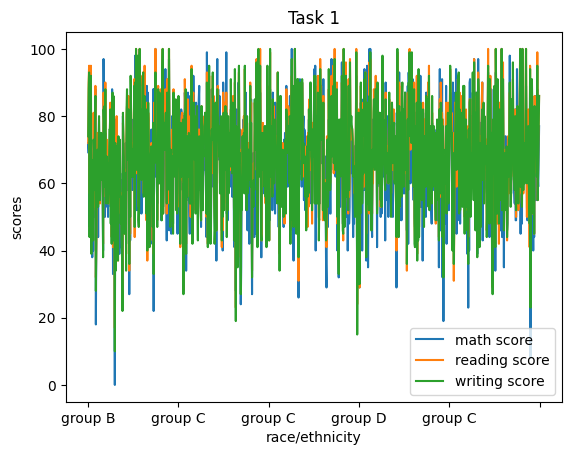

In [3]:
import pandas as pd

import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Misc\StudentsPerformance.csv')

df.plot(x="race/ethnicity", y=["math score", "reading score", "writing score"], kind="line")

plt.xlabel('race/ethnicity')

plt.ylabel('scores')

plt.title('Task 1')

plt.show()

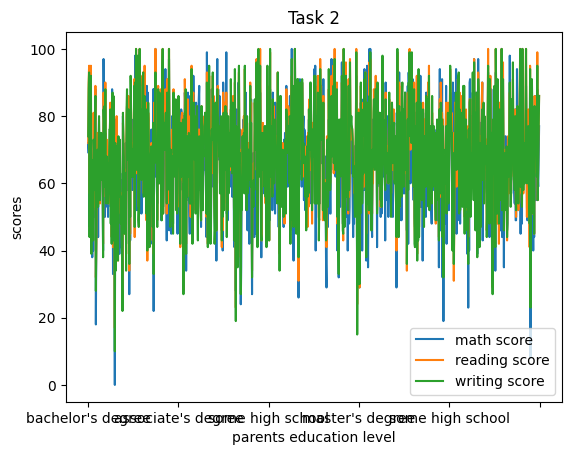

In [4]:
import pandas as pd

import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Misc\StudentsPerformance.csv')

df.plot(x="parental level of education", y=["math score", "reading score", "writing score"], kind="line")

plt.xlabel('parents education level')

plt.ylabel('scores')

plt.title('Task 2')

plt.show()

In [5]:
import pandas as pd

import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Misc\StudentsPerformance.csv')

df[(df['test preparation course'] == 'completed') & (df['gender'] == 'female') & (df['race/ethnicity'] == 'group A')][['gender', 'race/ethnicity', 'test preparation course', 'math score', 'reading score', 'writing score']]

,gender,race/ethnicity,test preparation course,math score,reading score,writing score
46,female,group A,completed,55,65,62
423,female,group A,completed,59,85,80
468,female,group A,completed,77,88,85
546,female,group A,completed,92,100,97
651,female,group A,completed,68,80,76
653,female,group A,completed,65,70,74
778,female,group A,completed,72,79,82
820,female,group A,completed,85,90,92
837,female,group A,completed,75,82,79
902,female,group A,completed,34,48,41


In [7]:
import pandas as pd
import pyodbc as py

df = pd.read_csv(r'C:\Misc\StudentsPerformance.csv')

# Filter the data
filtered_data = df[(df['race/ethnicity'] == 'group A') & 
                     (df['gender'] == 'female') & 
                     (df['test preparation course'] == 'completed')]

# Connect to SQL Server
conn = py.connect( 'Driver={ODBC Driver 17 for SQL Server};'
                      'Server=localhost;'
                      'database=Vinuthna Sarabu;'
                      'trusted_connection=yes;' 
)

# Insert filtered data into SQL Server table
cursor = conn.cursor()

for index, row in filtered_data.iterrows():
    cursor.execute("INSERT INTO StudentsPerformance (gender, race_ethinicity, test_preparation_course, math_score, reading_score, writing_score) VALUES (?, ?, ?, ?, ?, ?)",
                   row['gender'], 
                   row['race/ethnicity'], 
                   row['test preparation course'], 
                   row['math score'], 
                   row['reading score'], 
                   row['writing score'])

# Commit the transaction and close the connection
conn.commit()
conn.close()
